# What’s spaCy?


spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

If you’re working with a lot of text, you’ll eventually want to know more about it. For example, what’s it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

# What spaCy isn’t

spaCy is not a platform or “an API”. Unlike a platform, spaCy does not provide a software as a service, or a web application. It’s an open-source library designed to help you build NLP applications, not a consumable service.

spaCy is not an out-of-the-box chat bot engine. While spaCy can be used to power conversational applications, it’s not designed specifically for chat bots, and only provides the underlying text processing capabilities

spaCy is not research software. It’s built on the latest research, but it’s designed to get things done. This leads to fairly different design decisions than NLTK or CoreNLP, which were created as platforms for teaching and research. The main difference is that spaCy is integrated and opinionated. spaCy tries to avoid asking the user to choose between multiple algorithms that deliver equivalent functionality. Keeping the menu small lets spaCy deliver generally better performance and developer experience.

spaCy is not a company. It’s an open-source library. Our company publishing spaCy and other software is called Explosion.

## Features


In the documentation, you’ll come across mentions of spaCy’s features and capabilities. Some of them refer to linguistic concepts, while others are related to more general machine learning functionality.



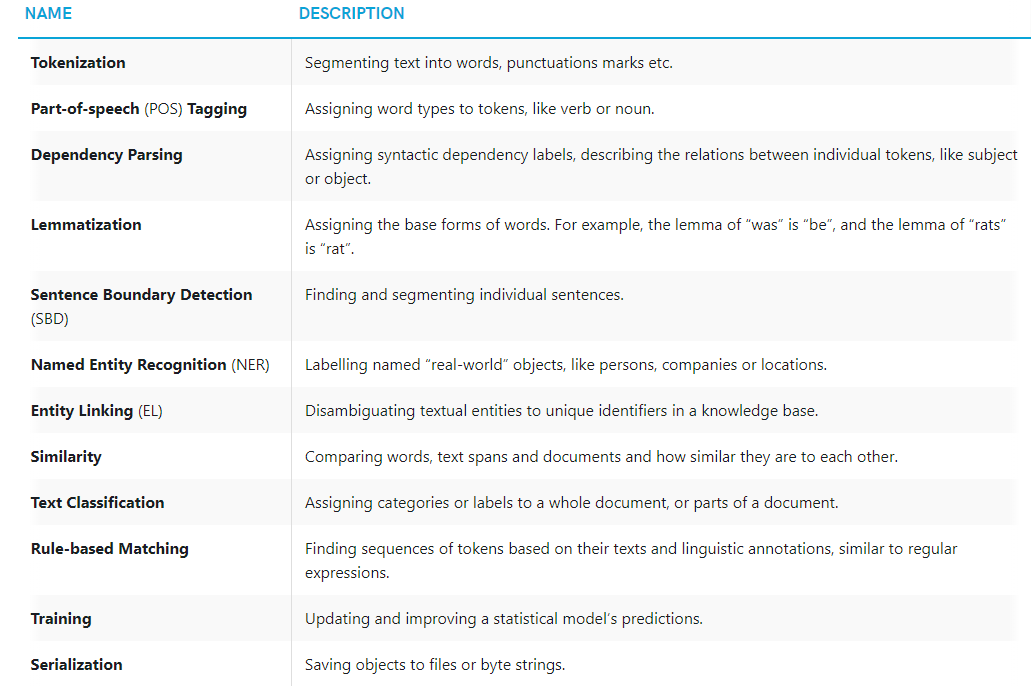

# Statistical models



While some of spaCy’s features work independently, others require trained pipelines to be loaded, which enable spaCy to predict linguistic annotations – for example, whether a word is a verb or a noun. A trained pipeline can consist of multiple components that use a statistical model trained on labeled data. spaCy currently offers trained pipelines for a variety of languages, which can be installed as individual Python modules. Pipeline packages can differ in size, speed, memory usage, accuracy and the data they include. The package you choose always depends on your use case and the texts you’re working with. For a general-purpose use case, the small, default packages are always a good start.

Binary weights for the part-of-speech tagger, dependency parser and named entity recognizer to predict those annotations in context.

Lexical entries in the vocabulary, i.e. words and their context-independent attributes like the shape or spelling.

Data files like lemmatization rules and lookup tables.

Word vectors, i.e. multi-dimensional meaning representations of words that let you determine how similar they are to each other.

Configuration options, like the language and processing pipeline settings and model implementations to use, to put spaCy in the correct state when you load the pipeline.


# Linguistic annotations

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

For example, en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

In [2]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


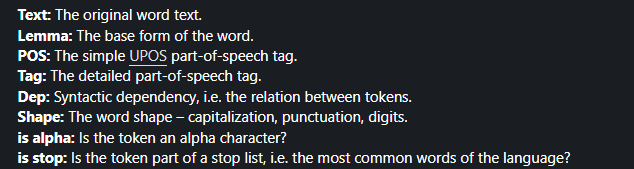

# Tokenization


In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple don't/is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text)

Apple
don't
/
is
looking
at
buying
U.K.
startup
for
$
1
billion


In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


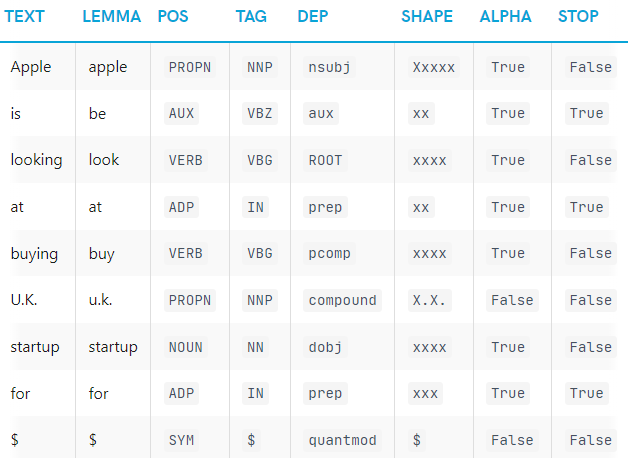

# Named Entities

In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


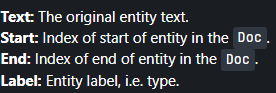

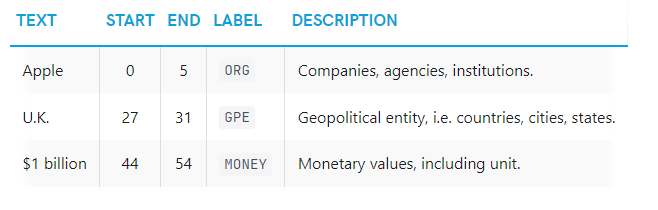

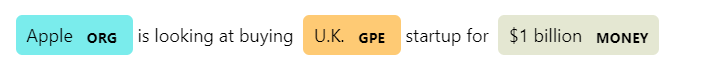

# Word vectors and similarity

In [10]:
nlp = spacy.load("en_core_web_md")
tokens = nlp("dog cat banana afskfsd")
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 75.254234 False
cat True 63.188496 False
banana True 31.620354 False
afskfsd False 0.0 True


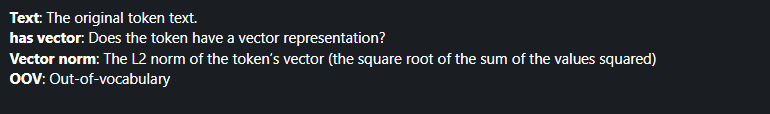

1. Compare two different tokens and try to find the two most dissimilar tokens in the texts with the lowest similarity score (according to the vectors).

2. Compare the similarity of two Lexeme objects, entries in the vocabulary. You can get a lexeme via the .lex attribute of a token. You should see that the similarity results are identical to the token similarity.

In [12]:
import spacy

nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.691649353055761
hamburgers
salty fries <-> hamburgers 0.6938489675521851


# Pipelines

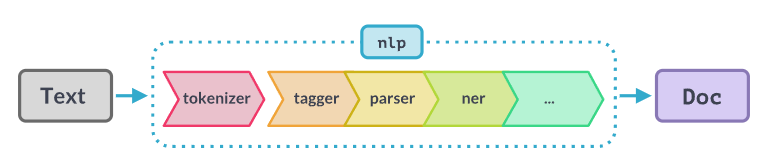

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.



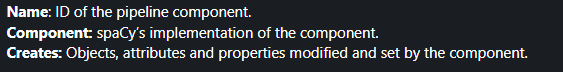

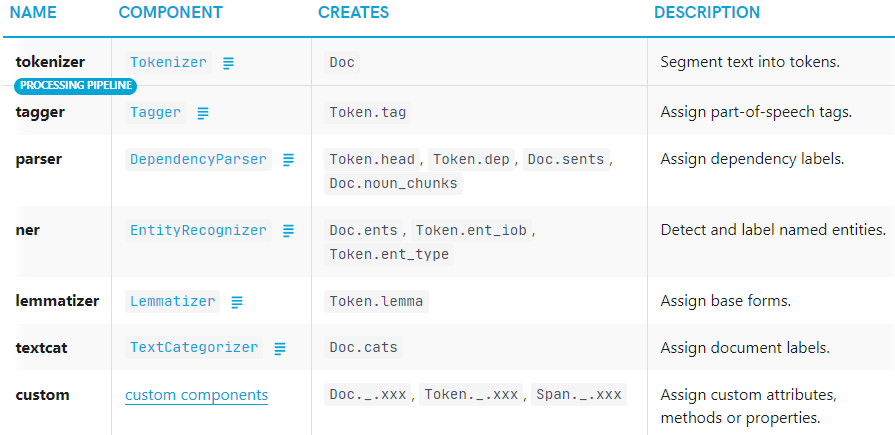

# Vocab, hashes and lexemes

In [15]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee'

3197928453018144401
coffee


In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
for word in doc:
    lexeme = doc.vocab[word.text]
    print(lexeme.text, lexeme.orth, lexeme.shape_, lexeme.prefix_, lexeme.suffix_,
            lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

I 4690420944186131903 X I I True False True en
love 3702023516439754181 xxxx l ove True False False en
coffee 3197928453018144401 xxxx c fee True False False en


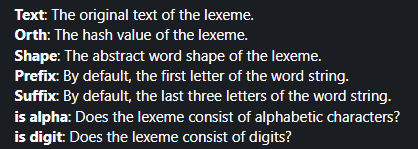

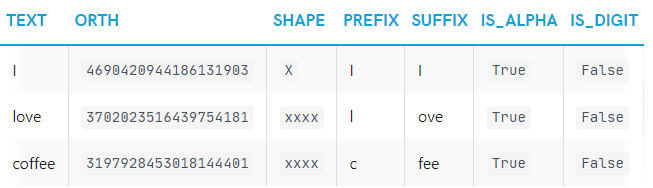

In [18]:
from spacy.tokens import Doc
from spacy.vocab import Vocab

nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")  # Original Doc
print(doc.vocab.strings["coffee"])  # 3197928453018144401
print(doc.vocab.strings[3197928453018144401])  # 'coffee' 👍

empty_doc = Doc(Vocab())  # New Doc with empty Vocab
# empty_doc.vocab.strings[3197928453018144401] will raise an error :(

empty_doc.vocab.strings.add("coffee")  # Add "coffee" and generate hash
print(empty_doc.vocab.strings[3197928453018144401])  # 'coffee' 👍

new_doc = Doc(doc.vocab)  # Create new doc with first doc's vocab
print(new_doc.vocab.strings[3197928453018144401])  # 'coffee' 👍

3197928453018144401
coffee
coffee
coffee


# Language data

In [19]:
from spacy.lang.en import English
from spacy.lang.de import German

nlp_en = English()  # Includes English data
nlp_de = German()  # Includes German data

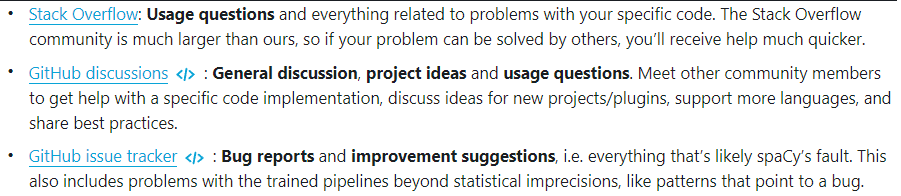